# Homework 2


## Linear Time Iteration

A deterministic one-dimensional linear model for inflation is written in the form:

$$\pi_{t+1} = (\lambda_1 + \lambda_2) \pi_t - \lambda_1 \lambda_2 \pi_{t-1}$$

with $0<\lambda_1<\lambda_2$
Here, inflation is backward looking in the sense that inflation $\pi_t$ will depend on past inflation $\pi_{t-1}$.
The solution takes the form $\forall t, \space \pi_t = \lambda \pi_{t-1}$ where $\lambda$ is a constant to be determined.

1. __(Theory) Write down the second order equation $P(\lambda)=0$, which characterizes $\lambda$. What are the roots of polynomial $P$ ?__
    

$\pi_{t}=\lambda \pi_{t-1}$
so 
$$\pi_{t+1} =(\lambda_1+\lambda_2) \lambda \pi_{t-1} - \lambda_1 \lambda_2 \pi_{t-1}$$

$$\lambda^2\pi_{t-1} =[(\lambda_1+\lambda_2) \lambda - \lambda_1 \lambda_2 ]\pi_{t-1}$$

$$\lambda\pi_{t} =(\lambda_1+\lambda_2)]\pi_{t}- \lambda_1 \lambda_2\pi_{t-1}$$
$$\pi_{t} =\frac{-\lambda_1 \lambda_2}{\lambda - \lambda_1-\lambda_2}\pi_{t-1}$$

$$\pi_{t} =\frac{-\lambda_1 \lambda_2}{\lambda - \lambda_1-\lambda_2}\pi_{t-1}$$

Our second order equation
$$P(\lambda)=0=[\lambda^2-(\lambda_1+\lambda_2) \lambda + \lambda_1 \lambda_2 ]\pi_{t-1}=0$$

Get $P(\lambda)=0$
$$ \lambda^2 - (\lambda_1+\lambda_2) \lambda + \lambda_1 \lambda_2 =0$$

$$\Delta=b^2 - 4ac= (\lambda_1+\lambda_2)^2 -4\lambda_1\lambda_2$$
$$\Lambda_1=\frac{(\lambda_1+\lambda_2)-\sqrt{\Delta}}{2}$$
$$\Lambda_2=\frac{(\lambda_1+\lambda_2)+\sqrt{\Delta}}{2}$$

2ND METHOD:

By Newton algorithm we know that for $P(\lambda)=0$ we could initiate a first guess $\Lambda_0$ such that:
$$P(\lambda^{TRUE})=0=f(\lambda^{TRUE})=f(\Lambda_0)+f'(\Lambda_0)(\lambda^{TRUE}-\Lambda_0)+\omicron(\lambda^{TRUE}-\Lambda_0)$$
And:
$$f(\lambda)=P(\lambda)=\lambda^2 - (\lambda_1+\lambda_2) \lambda + \lambda_1 \lambda_2 =0$$
We can then have a good approximation by stating that:
$$\lambda^{TRUE}=\Lambda_0-\frac{f(\Lambda_0)}{f'(\Lambda_0)}$$

$$f'(\lambda)=2\lambda-(\lambda_1+\lambda_2)$$
Hence:
$$\lambda^{TRUE}=\Lambda_0-\frac{\Lambda^2_0 - (\lambda_1+\lambda_2) \Lambda_0 + \lambda_1 \lambda_2 }{2\Lambda_0-(\lambda_1+\lambda_2)}$$

$$\lambda^{TRUE}=\frac{2\Lambda^2_0-\Lambda_0(\lambda_1+\lambda_2)-\Lambda^2_0+(\lambda_1+\lambda_2)\Lambda_0-\lambda_1\lambda_2}{2\Lambda_0-(\lambda_1+\lambda_2)}$$

$$T(X)=\lambda^{TRUE}=\frac{\Lambda^2_0-\lambda_1\lambda_2}{2\Lambda_0-(\lambda_1+\lambda_2)}$$

In [1]:
struct Parameters
    λ1 #lambda1
    λ2 #lambda2
end
par=Parameters(1.0,3.0)

Parameters(1.0, 3.0)

In [2]:
# Λ=guess, λ=lambda1, ω=lambda2
function next(Λ::Float64; p::Parameters)
    fun=Λ^2-Λ*(p.λ1+p.λ2)+(p.λ1*p.λ2)
    first=2Λ-(p.λ1+p.λ2)
    res=Λ-(fun/first)

    return res
end

next (generic function with 1 method)

In [7]:
function simulatepath(Λ::Float64, p::Parameters, T::Int)
    sim=[]
    for t=1:T
        push!(sim, Λ)
        k1 = next(Λ;p=p)
        Λ = k1
    end
    return sim
end

simulatepath (generic function with 1 method)

In [3]:
function newton(Λ::Float64,par ;η=1e-20,T=100000)
    for t=1:T
        K=next(Λ;p=par)
        if abs(K-Λ)<η
            return K
        end
        Λ=K
    end
    return Λ
end

newton (generic function with 1 method)

In [4]:
res=newton(10.0,par)

2.9999999999999996

indeed when we let $\Lambda=3.0$, we have $P(\lambda)=0$. 

For given $\lambda_1=1.0$ and $\lambda_2=3.0$, we have $P(\lambda^{TRUE})=0$ for $\lambda^{TRUE}=\Lambda=3.0$

In [5]:
Λ=res
fun=Λ^2-Λ*(par.λ1+par.λ2)+(par.λ1*par.λ2)

0.0

2. __(Theory 2) Justify that $T(x) = \frac{-\lambda_1\lambda_2}{x-\lambda_1-\lambda_2}$ is the time iteration operator. Show that it admits two fixed points, but that only one of them is stable by computing $|T^{\prime}|$.__

According to the proof in (1) and assumption on $\pi_{t}=\lambda \pi_{t-1}$,
we have our time operator:
$$T(\lambda)=\frac{-\lambda_1 \lambda_2}{\lambda - \lambda_1-\lambda_2}$$
Under our assumption $\pi_{t}=\lambda \pi_{t-1}$ relation
$$\lambda=\frac{-\lambda_1 \lambda_2}{\lambda - \lambda_1-\lambda_2}$$


Given $\Lambda_1$ and $\Lambda_2$, we have 2 fixed points. We can simulate and see that only one of them is stable. 

Following simulation take for a first guess $\Lambda=10.0$ and converge to $\Lambda=\lambda_2=3.0$ when $\lambda_1=1.0$ and $\lambda_2=3.0$

Following simulation take for a second guess $\Lambda=-10.0$ and converge to $\Lambda=\lambda_2=1.0$ when $\lambda_1=1.0$ and $\lambda_2=3.0$

Consequently, there are 2 fixed points but only one of them is stable when computing from a guess $\Lambda$.

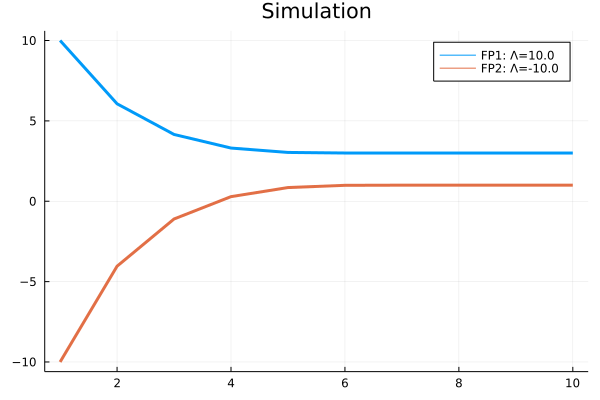

In [8]:
T=10
using Plots
fixedpoint1=simulatepath(10.0, par, T)
fixedpoint2=simulatepath(-10.0, par, T)

plot(1:T,fixedpoint1, title="Simulation", label="FP1: Λ=10.0",lw=3)
plot!(1:T,fixedpoint2, label= "FP2: Λ=-10.0",lw=3)

It is actually possible (and easy) to show that the series $(x_n)$ defined recursively by $x_n = T(x_{n-1})$ converges to $\lambda_1$ starting from any initial point $x_0$, except from $\lambda_2$. This method of computing a solution is called *linear time iteration*.

3. __Implement the linear time iteration and illustrate its convergence graphically by plotting its progress,  starting from various levels of $x_0$. Show one case with $\lambda_1<\lambda_2<1$, one with $\lambda_1<1<\lambda_2$ and one with $1<\lambda_1<\lambda_2$.__

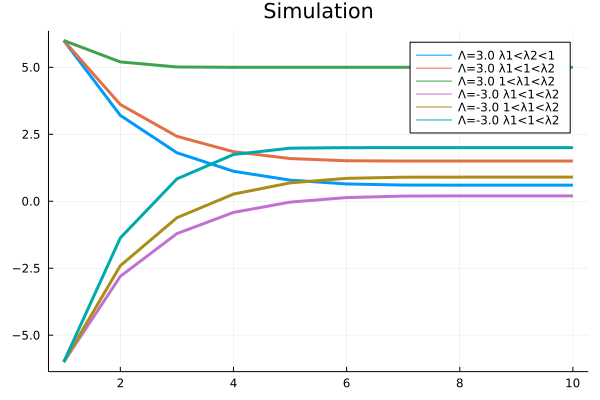

In [9]:
using Distributions

#define time iteration and number of simulation. 
T=10
nbersim=100
#Case 1 : λ1=0.2, λ2=0.6
case1=Parameters(0.2,0.6)
#Case 2 : λ1=0.9, λ2=1.5
case2=Parameters(0.9,1.5)
#Case 3: λ1=2.0, λ2=5.0
case3=Parameters(2.0,5.0)

using Plots
#lets start with Λ=3.0 and plot convergence for the 3 cases
Λ=6.0
Λlow=-6.0
r1=simulatepath(Λ,case1,T)
r2=simulatepath(Λ,case2,T)
r3=simulatepath(Λ,case3,T)

r4=simulatepath(Λlow,case1,T)
r5=simulatepath(Λlow,case2,T)
r6=simulatepath(Λlow,case3,T)

plot(1:T,r1, title="Simulation", label="Λ=3.0 λ1<λ2<1",lw=3)
plot!(1:T,r2, label= "Λ=3.0 λ1<1<λ2",lw=3)
plot!(1:T,r3, label="Λ=3.0 1<λ1<λ2",lw=3)
plot!(1:T,r4, label= "Λ=-3.0 λ1<1<λ2",lw=3)
plot!(1:T,r5, label="Λ=-3.0 1<λ1<λ2",lw=3)
plot!(1:T,r6, label= "Λ=-3.0 λ1<1<λ2",lw=3)


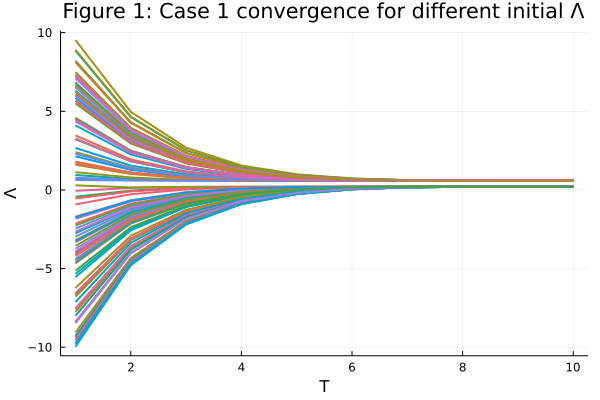

In [10]:
#Case 1 : λ1=0.2, λ2=0.6
sim1=simulatepath(Λ,case1,T)
for i in 1:nbersim
    x = rand(Uniform(-10.0,10.0))
    sims1 = simulatepath(x, case1, T)
    sim1 = hcat(sim1, sims1)
end

pl1=plot(x= 1:T, sim1[:,1], 
    legend = false, xlabel = "T", ylabel = "Λ", 
    title = "Figure 1: Case 1 convergence for different initial Λ",
    lw=2)
for i in 2:nbersim+1
    plot!(pl1, x=1:T, sim1[:,i],lw=2)
end
pl1


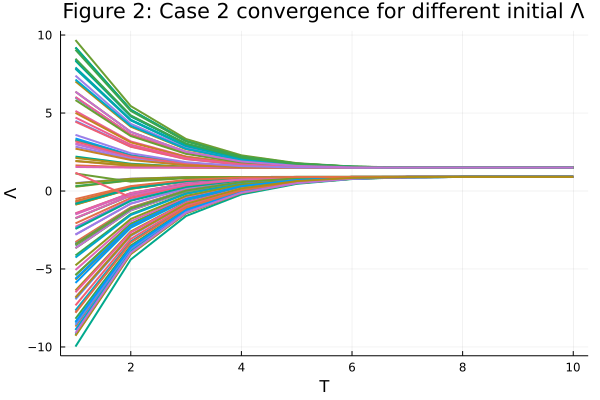

In [11]:
#Case 2 : λ1=0.9, λ2=1.5
sim2=simulatepath(Λ,case2,T)
for i in 1:nbersim
    x = rand(Uniform(-10.0,10.0))
    sims1 = simulatepath(x, case2, T)
    sim2 = hcat(sim2, sims1)
end

pl2=plot( x= 1:T, sim2[:,1], 
    legend = false, xlabel = "T", ylabel = "Λ", 
    title = "Figure 2: Case 2 convergence for different initial Λ",
    lw=2)
for i in 2:nbersim+1
    plot!(pl2, x=1:T, sim2[:,i],lw=2)
end
pl2


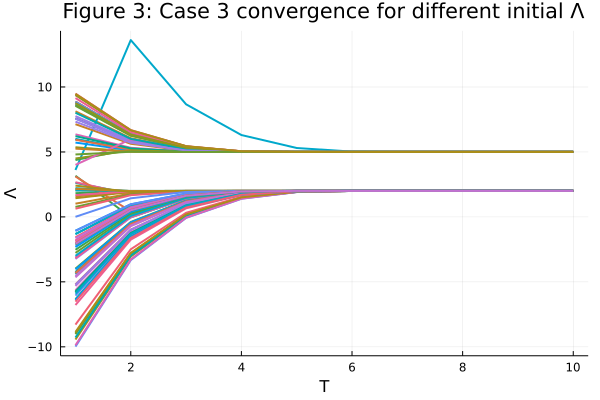

In [13]:
#Case 3: λ1=2.0, λ2=5.0
sim3=simulatepath(Λ,case3,T)
for i in 1:nbersim
    x = rand(Uniform(-10.0,10.0))
    sims1 = simulatepath(x, case3, T)
    sim3 = hcat(sim3, sims1)
end

pl3=plot( x= 1:T, sim3[:,1], 
    legend = false, xlabel = "T", ylabel = "Λ", 
    title = "Figure 3: Case 3 convergence for different initial Λ",
    lw=2)
for i in 2:nbersim+1
    plot!(pl3, x=1:T, sim3[:,i],lw=2)
end
pl3

4. __A model is well specified if it admits a unique non-diverging solution. What method would you propose to check that the solution obtained by linear time-iteration is convergent and unique?__

Jacobi method check google and course

5. __(Bonus) Implement an *improved* linear time iteration algorithm, that is a Newton descent applied to $x-T(x)$ and discuss its convergence.__

Since
$$T(\lambda)=\frac{-\lambda_1 \lambda_2}{\lambda - \lambda_1-\lambda_2}$$
We implement a function such that it stops when the difference between $\lambda^{TRUE}$ and $T(\lambda)$ is super small. 

In [73]:
T=10
function newtondescent(Λ::Float64,par, T::Int ;η=1e-20)
    timeoperator=(-par.λ1*par.λ2)/(Λ-par.λ1-par.λ2)
    for t=1:T
        K=next(Λ;p=par)
        if abs(K-timeoperator)<η
            return K
        end
        Λ=K
    end
    return Λ
end

function newtondescentsim(Λ::Float64,par, T::Int ;η=1e-20)
    timeoperator=(-par.λ1*par.λ2)/(Λ-par.λ1-par.λ2)
    simnewtondescent=[]
    for t=1:T
        push!(simnewtondescent,Λ)
        K=next(Λ;p=par)
        if abs(K-timeoperator)<η
            return K
        end
        Λ=K
    end
    return simnewtondescent
end

newtondescentsim (generic function with 1 method)

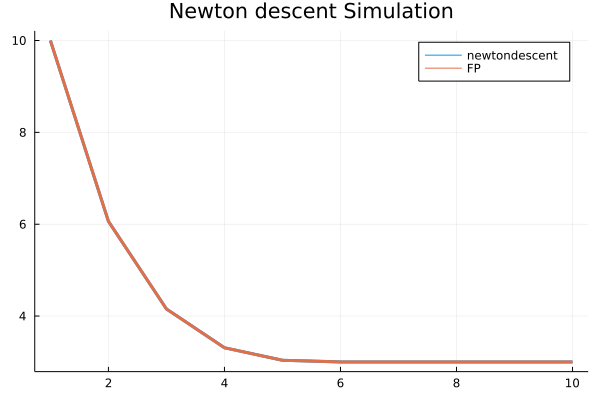

In [74]:
Λ=newtondescent(10.0,par,T);
newtonsim=newtondescentsim(10.0,par,T);

plot(1:T,newtonsim, title="Newton descent Simulation",label="newtondescent", lw=3)
plot!(1:T,fixedpoint1, title="Newton descent Simulation", label="FP", lw=3)


In [69]:
[fixedpoint1, newtonsim]

2-element Vector{Vector{Any}}:
 [10.0, 6.0625, 4.154326923076923, 3.3092545126431254, 3.036523973248357, 3.0006434972351226, 3.000000206911199, 3.000000000000021, 2.9999999999999996, 2.9999999999999996]
 [10.0, 6.0625, 4.154326923076923, 3.3092545126431254, 3.036523973248357, 3.0006434972351226, 3.000000206911199, 3.000000000000021, 2.9999999999999996, 2.9999999999999996]

## Dividend Pricing

A dividend process is described by $d_t=\exp(\epsilon) (d_{t-1})^\rho$ with $\rho=0.9$ and $\epsilon$ a normal i.i.d. process with mean 0 and standard deviation 0.05.
Given discount rate $\beta=0.95$ our ultimate goal is to evaluate the risk neutral price of a right to the dividend, which satisfies:

$$p_t=d_t + \beta E_t \left[ p_{t+1} \right]$$

In functional form, we look for a function $p()$ such that

$$\forall d, \color{blue}{p}(d)=d+\beta E_{\epsilon} \left[ \color{red}{p}\left( \exp(\epsilon) (d)^\rho \right)\right]$$

The general algorithm, will consist in updating the price function on the left as a function of the price function on the right. It raises two challenges:
- integrate the term within the square brackets (we'll use quadrature)
- interpolate the price function so that it can be evaluated at any realisation of $\exp(\epsilon) (d)^\rho$

1. __Integration: discretize random shock $\epsilon_t$ with $K=5$ nodes and weights $(w_i, \epsilon_i)$ by using a gauss-hermite quadrature.
As an example, use this discretization to evaluate $\mathbb{E}\left(\epsilon^2\right)$ and $\mathbb{E}\left[ \exp(\epsilon)\right]$.__

In [39]:
using Distributions
using FastGaussQuadrature, LinearAlgebra
#Question 1
K=5
(y, w) = gausshermite(K)

([-2.0201828704560856, -0.9585724646138196, -8.881784197001252e-16, 0.9585724646138196, 2.0201828704560856], [0.019953242059045872, 0.39361932315224074, 0.9453087204829428, 0.39361932315224074, 0.019953242059045872])

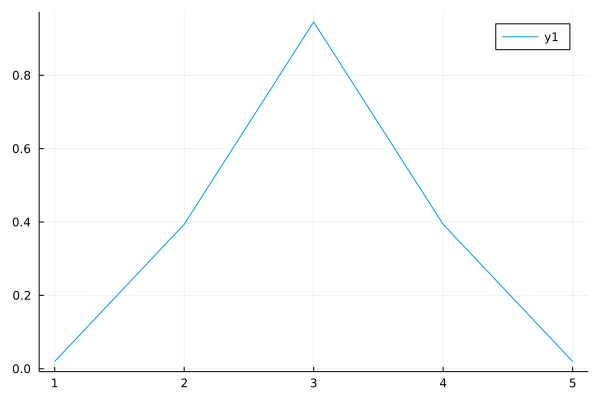

In [45]:
f(x)=x^2
g=f.(y)

In [46]:
function ghermite(y,w)
    f(x)=x^2
    f.(y)
    g(x)=exp(x)
    g.(y)
    I_x2 = dot(w, f.(y))
    I_exp=dot(w,g.(y))
    return [I_x2, I_exp]
end

ghermite (generic function with 1 method)

In [47]:
int=ghermite(y,w)

2-element Vector{Float64}:
 0.8862269254527586
 2.2758737343665025

In [64]:
println("Integral from function f between -1 and 1 is ", int[1,1])
print("Integral from function g between -1 and 1 is ", int[2,1])

Integral from function f between -1 and 1 is 0.8862269254527586
Integral from function g between -1 and 1 is 2.2758737343665025

2. __Interpolation: for $N=20$, propose a regular grid $(d_1, ... d_N)$ for $d$ that is large enough to contain a large fraction of of the realizations of $d_t$. An function $p()$ will be identified with an $N$-components vector `p`$=(p_1, ..., p_N)=(p(d_1), ..., p(d_N))$ and linear interpolation will be used to evaluate `p` outside of the grid points (you can use library `interpolations.jl`) . Choose an initial guess for $p()$, for instance $p(d)=d^2$ and plot the interpolated function.__

<mark>Hint</mark>: given a vector of points `x` and matching vector of values `y`, you can use `itp = LinearInterpolation(x, y, extrapolation_bc = Line())` to construct a smooth function, which equals `y` on `x`. You can then interpolate at any point or vector of points `z` with `itp(z)`.


In [ ]:
N=20

3. __Assuming vector `p0` represents the $p()$ function on the right, compute `p1` vector which represents the $p()$ function on the left. Call `T()` the function which map `p0` to `p1`.__

4. __Find the equilibrium price `p` by iterating on `T()`. Plot.__

5. __Bonus: justify why the function `T(p)` is actually linear in `p`. Use `IterativeSolver.jl` to solve directly the equation `p=T(p)` (check the doc...). Compare results and number of iterations with the precendent function.__

## Brock-Mirman Stochastic Growth model

Here is a neoclassical growth model with unpredictable shocks on productivity.

Social planner tries to solve:

$$\max E_t \left[ \sum_{n=0}^{\infty} \beta^n \log C_{t+n} \right]$$

s.t.

$$K_{t+1} = Y_t - C_t$$
$$Y_{t+1} = A_{t+1}K_{t+1}^\alpha$$

where $A_t$ is the level of productivity in period $t$. 
It can take  values $A^h=1.05$ and $A^l=0.95$. The transition between these two states are given by the matrix:
$$P = \begin{bmatrix}
0.9, 0.1\\
0.1, 0.9
\end{bmatrix}$$

We want to solve this problem by converting it into a discrete dynamic programming problem.

__Propose a plausible calibration__

In [120]:
using QuantEcon
P = [0.9   0.1
     0.1   0.9]
labels = ["AH", "AL"]

mc = MarkovChain(P,labels)

N=1000

x=simulate(mc, N)

1000-element Vector{String}:
 "AL"
 "AL"
 "AL"
 "AL"
 "AL"
 "AL"
 "AL"
 "AL"
 "AL"
 "AH"
 "AH"
 "AH"
 "AH"
 ⋮
 "AL"
 "AL"
 "AL"
 "AL"
 "AL"
 "AH"
 "AH"
 "AH"
 "AL"
 "AL"
 "AH"
 "AH"

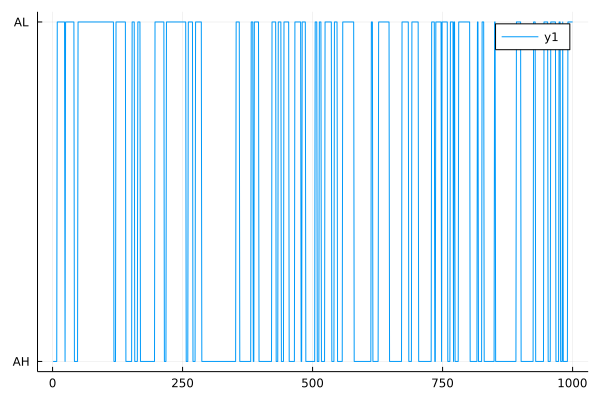

In [116]:
plot(1:1000, x)

In [117]:
sum(x.=="AH")
sum(x.=="AL")

0

In [32]:
struct Calibration
    α
    AH
    AL
    β
end
cal=Calibration(
    0.3,
    1.05,
    0.95,
    0.96
)

Calibration(0.3, 1.05, 0.95, 0.96)

In [ ]:
function transition(Y0, C0, cal)
    K1 = Y0 - C0
    Y1 = A1*K1^(cal.α)
    return [Y1, K1]
end

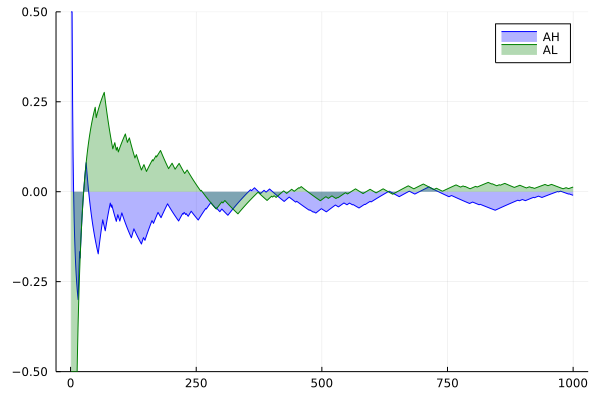

In [79]:
using QuantEcon
using Plots
mc = MarkovChain(P)
N = 1_000
p̄ = 0.5# steady-state probabilities

labels = ["AH", "AL"]
y_vals = Array{Vector}(undef, 2) # sample paths holder
val = Array{Vector}(undef, 2) # sample paths holder

for x0 in 1:2
    X = simulate_indices(mc, N; init = x0) # generate the sample path
    X̄ = cumsum(X .== 1) ./ (1:N) # compute state fraction. ./ required for precedence
    y_vals[x0] = X̄ .- p̄ # plot divergence from steady state
    val[x0]=X̄
end

plot(y_vals, color = [:blue :green], fillrange = 0, fillalpha = 0.3,
     ylims = (-0.5, 0.5), label = reshape(labels, 1, length(labels)))

__What are the states? What are the controls? Is it possible to bound them in a natural way? Propose a discretization scheme for:__
- __the states (a vector of values)__
- __the controls (for each state, a vector of possible values)__
- __the transitions (a deterministic function which computes the next state as a function of current state and control)__

__Write down the Bellman equation__

__How do you represent a policy function? Implement a value evaluation function.__

__Solve the model using Value Function Iteration. Plot the solution.__

__Implement Policy Improvement Steps. Compare convergence Speed.__

__Bonus: Propose some ideas to improve performances.__